# Вариант 3

**Шаг 1**

Возьмите матрицу векторов словосочетаний из дз 2, сократите ее размерность до 2 с помощью MDS и визуализируйте результат. Заметны ли на этом этапе какие-то кластеры словосочетаний? Дает ли такая картинка представление о том, на сколько кластеров лучше всего разбить эти словосочетания?

In [1]:
import re
import gensim
from gensim.models import word2vec
import numpy as np
import pandas as pd
import urllib.request
import scipy
import scipy.spatial.distance as ds
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hcluster
from matplotlib.pyplot import figure
from sklearn.metrics import euclidean_distances

import warnings
warnings.filterwarnings('ignore')


urllib.request.urlretrieve("https://rusvectores.org/static/models/araneum_upos_skipgram_600_2_2017.bin.gz", "araneum_upos_skipgram_600_2_2017.bin.gz")

m = 'araneum_upos_skipgram_600_2_2017.bin.gz'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

In [2]:
df = pd.read_csv("HW2_igrat'.txt", delimiter = "\t", header = None)

In [3]:
df.head(3)

,0,1
0,играть_роль,3121
1,играть_музыка,614
2,играть_ребенок,335


In [4]:
nouns = []
for i in range(0, len(df)):
    noun = df[0][i].split('_')
    nouns.append(noun[1] + "_NOUN")

In [5]:
v_vector = model['играть_VERB']

In [6]:
words_vectors, vectors = {}, {}
for noun in nouns:
    # такого нет уже в нескольких моделях
    if noun != 'раз_NOUN':
        words_vectors[noun] = model[noun]
        vectors['играть_VERB_' + noun] = v_vector + model[noun]

In [7]:
with open('matrix.tsv', 'w', encoding='utf-8') as f:
    for key in vectors:
        f.write(key + '\t')
        for vector in vectors[key]:
            f.write(str(vector) + '\t')
        f.write('\n')

In [8]:
with open('matrix.tsv', 'r', encoding='utf-8') as file:
    print(file.read(1000))

играть_VERB_роль_NOUN	0.06917355	0.1071523	0.067922324	0.00812622	0.034309436	-0.009787329	0.11050549	0.00016939733	0.10481891	0.02341181	0.10121631	0.004481717	-0.070984915	0.014704558	-0.08261214	-0.13143913	-0.14148685	0.07407219	0.07186953	-0.021397457	0.047467183	0.08670221	0.101115145	0.08872365	0.10510343	-0.016205005	0.012364504	-0.008446869	-0.06238799	-0.124060035	-0.0041220877	0.13717204	-0.029270977	0.06605778	-0.027670966	0.06345344	-0.008777959	0.057829965	-0.036850445	-0.09492189	-0.089959346	0.042678107	-0.041446485	-0.00012069568	-0.0029859114	-0.0914036	-0.058579504	0.032549936	-0.09494385	0.025100596	-0.0025877925	0.072362036	0.046026323	-0.124360844	0.02913297	-0.018734248	0.07625142	0.0902559	0.016296305	-0.038402755	0.071939215	0.07645365	0.05130457	-0.09552461	0.07124301	-0.10267158	-0.0972195	0.014098465	0.13289255	0.07213995	-0.012512704	-0.048501138	0.0105162095	0.05746903	0.14388354	-0.27397954	0.03447719	0.04070748	0.0355563	0.14387593	-0.056387536	-0.108622

In [9]:
array = []
with open ('matrix.tsv', 'r') as f:
    for line in f:
        line = line.strip().split('\t')
        vector = []
        for item in line[1:]:
            vector.append(float(item))
        array.append(vector)
X = np.array(array)
#print(X[1])

In [11]:
#сокращаем размерность
from sklearn import manifold
similarities = euclidean_distances(X)
mds = manifold.MDS(n_components=2)
print(mds.fit(similarities).stress_) 

3498.124160712693


In [12]:
arr_mds = mds.fit_transform(X)

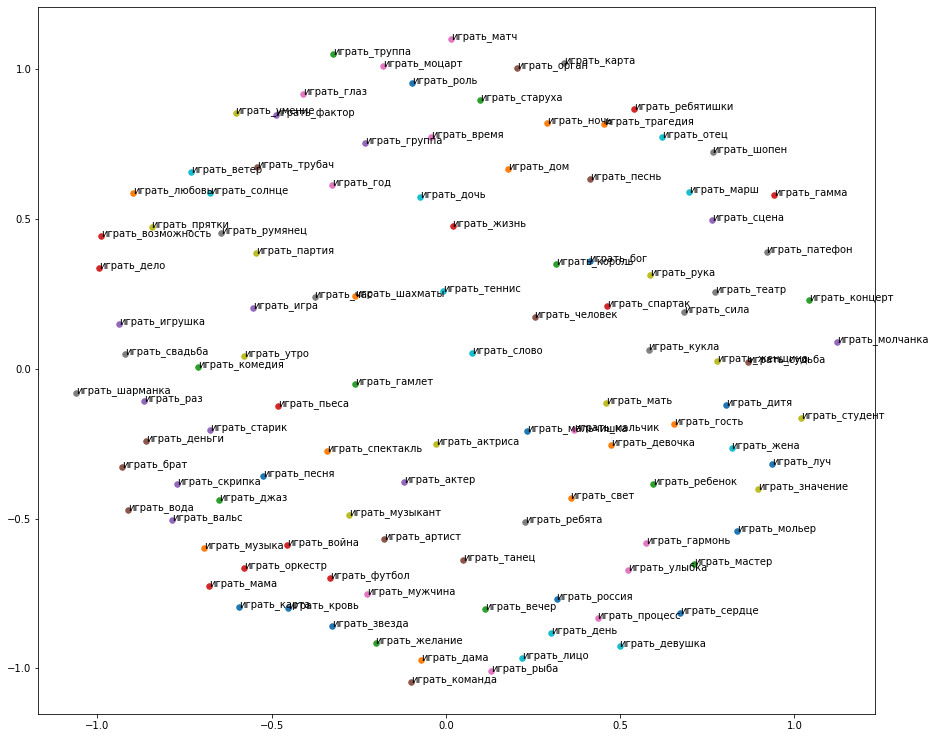

In [13]:
# график
verb = 'играть_VERB'
list_phrases = []
plt.figure(figsize=(15, 13))
for i in nouns:
    list_phrases.append(verb.split('_')[0] + '_' + i.split('_')[0])
x, y = [], []
for pair in arr_mds:
    x.append(pair[0])
    y.append(pair[1])
for i in range(len(x)):
    plt.scatter(x[i], y[i], s=30)
    plt.annotate(list_phrases[i], (x[i], y[i]))
plt.show()

Все распределено относительно равномерно и на основе такой картинки сложно выделить какие-либо кластеры

**Шаг 2 (max 3 балла).**

Возьмите финальный результат какой-нибудь из имеющихся у вас кластеризаций (на том этапе, где у вас остались уже только кластеры из трех элементов), присвойте каждому кластеру свой цвет и отобразите на графике MDS только эти элементы. Насколько такая картинка похожа на предыдущую, из Шага 1?

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=5).fit(X)
kmeans.labels_

array([0, 1, 3, 1, 1, 3, 0, 2, 1, 2, 4, 1, 1, 4, 3, 1, 3, 3, 3, 3, 1, 3,
       3, 1, 1, 0, 2, 3, 1, 2, 3, 3, 1, 0, 1, 0, 2, 2, 4, 0, 3, 2, 1, 1,
       4, 3, 1, 4, 3, 2, 1, 3, 1, 3, 1, 1, 2, 2, 2, 3, 4, 4, 4, 1, 1, 0,
       0, 1, 4, 2, 1, 2, 0, 0, 2, 0, 0, 4, 2, 3, 1, 1, 0, 4, 3, 1, 0, 1,
       2, 4, 0, 4, 3, 1, 3, 1, 0, 4, 4, 4, 4, 4, 2, 2, 0, 1, 3, 2, 1, 3,
       3], dtype=int32)

In [18]:
# кластеры
from scipy import spatial

simalirty = {}
for i in range(0, len(kmeans.cluster_centers_)):
    data2 = kmeans.cluster_centers_[i]
    coefs = {}
    for j in range(0, len(array)):
        data = array[j]
        result = 1 - spatial.distance.cosine(data, data2)
        coefs[j] = result
    simalirty[i] = coefs

In [19]:
# цвета для кластеров
new_vectors = {}
noun_vectors = {}
colors = []
for i in range(0, len(simalirty)):
    k = sorted(simalirty[i], key=simalirty[i].get, reverse=True)
    for j in k[:3]:
        if i == 0 and nouns[j] in model:
              colors.append('orange')
        elif i == 1 and nouns[j] in model:
              colors.append('yellow')
        elif i == 2 and nouns[j] in model:
              colors.append('green')
        elif i == 3 and nouns[j] in model:
              colors.append('purple')
        elif i == 4 and nouns[j] in model:
              colors.append('pink')
        if nouns[j] in model:
            new_vectors[verb + '_' + nouns[j]] = model[verb] + model[nouns[j]]
            noun_vectors[nouns[j]] = model[nouns[j]]

In [20]:
values = []
for i in list(new_vectors.keys()):
    i = i.split('_')
    j = i[0] + '_' + i[2]
    values.append(j)

In [21]:
values[0]

'играть_роль'

In [22]:
#запишем все в tsv-файл
with open('matrix_new.tsv', 'w', encoding='utf-8') as f:
    for key in new_vectors:
        f.write(key)
        f.write('\t')
        for vector in new_vectors[key]:
            f.write(str(vector))
            f.write('\t')
        f.write('\n')

In [23]:
matrix_new = []
with open ('matrix_new.tsv', 'r') as f:
    for line in f:
        line = line.strip().split('\t')
        vector = []
        for item in line[1:]:
            vector.append(float(item))
        matrix_new.append(vector)

In [24]:
Y = np.array(matrix_new)
print(Y.shape)
similarities = euclidean_distances(Y)
mds = manifold.MDS(n_components=2)
print(mds.fit(similarities).stress_)
array_mds_2 = mds.fit_transform(Y) 

(15, 600)
35.83011461231226


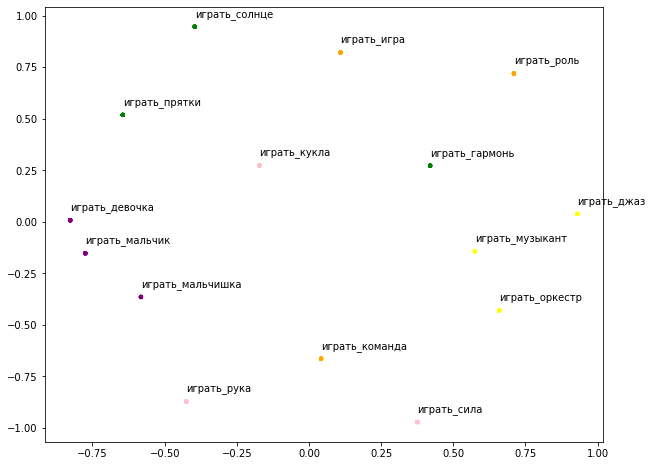

In [25]:
#график топ-3 кластеров
plt.figure(figsize=(10,8))
x = []
y = []
for pair in array_mds_2:
    x.append(pair[0])
    y.append(pair[1])
for i in range(len(x)):
    plt.scatter(array_mds_2[:, 0], array_mds_2[:, 1], color=colors, s=10)
    plt.annotate(values[i], (x[i], y[i]+0.05))
plt.show()

Здесь уже нагляднее видны кластеры. Слова из одних кластеров близко друг к другу, например, {мальчик, девочка, мальчишка}. Картинка совсем не похожа на ту, что была ранее 

**Шаг 3 (max 3 балла).**

Извлеките из словосочетаний, с которыми вы работали на предыдущем шаге, все существительные. Для них у вас есть векторные представления (вы использовали их для формирования векторов словосочетаний), соберите их все в одну матрицу, сократите размерность этой матрицы до 2 методом MDS и визуализируйте результат. Что получилось? Похожа ли эта картинка на график из Шага 2? Какие из этого можно сделать выводы?

In [26]:
nouns_only = []
with open('nouns_only.tsv', 'w', encoding='utf-8') as f:
    for key in noun_vectors:
        f.write(key + '\t')
        for vector in noun_vectors[key]:
            f.write(str(vector) + '\t')
        f.write('\n')
with open('nouns_only.tsv', 'r') as f:
    for line in f:
        line = line.strip().split('\t')
        vector = []
        for item in line[1:]:
            vector.append(float(item))
        nouns_only.append(vector)

In [27]:
N = np.array(nouns_only)
similarities = euclidean_distances(N)
mds = manifold.MDS(n_components=2)
array_mds_n = mds.fit_transform(N) 
print(N.shape)
print(mds.fit(similarities).stress_)

(15, 600)
36.484567983975154


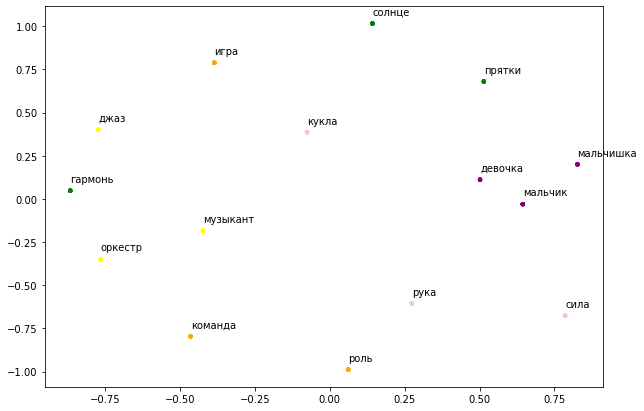

In [28]:
plt.figure(figsize=(10,7))
x, y = [], []
for pair in array_mds_n:
    x.append(pair[0])
    y.append(pair[1])
for i in range(len(x)):
    plt.scatter(array_mds_n[:, 0], array_mds_n[:, 1], color=colors, s=10)
    plt.annotate([i.split('_')[0] for i in list(noun_vectors.keys())][i], (x[i], y[i]+0.05))
plt.show() 

Получившийся график схож с тем, что в шаге 2. {мальчик, девочка, мальчишка} тоже близко друг к другу и в целом слова из одного кластера находятся в группах. 

**Шаг 4 (бонусный, max 1 балл).**

In [29]:
# попарные косинусные расстояния
nouns_cos, _cos = [], []
for index, one in enumerate(nouns_only):
    for two in nouns_only[index+1:]:
        nouns_cos.append(ds.cosine(one, two))
for index, one in enumerate(matrix_new):
    for two in matrix_new[index+1:]:
        _cos.append(ds.cosine(one, two))

In [30]:
# коэффициент корреляции Пирсона 
R1 = np.corrcoef(_cos, nouns_cos)
R1

array([[1.        , 0.94891484],
       [0.94891484, 1.        ]])